ChEn-3170: Computational Methods in Chemical Engineering Fall 2021 UMass Lowell; Prof. V. F. de Almeida **27Oct20**

# 10. Universal Linear Solver
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Any Linear System (Detailed Algorithm)](#any)
* [Universal Solver](#usolver)
* [Anomalous Least-Squares Data Fitting](#fit)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-universal-lsolver](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EgTyfAiTr59Dk3yAb3eCZEcBeJZj2oWviJeXKpeRIB2YOg?e=aTnFnR) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

Compute the solution vector $\xvec$ for a given matrix $\Amtrx$ and right-side vector $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

When $\Amtrx$ is rank deficient, $\Amtrx^\top\Amtrx$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec },
\end{equation*}

*either have an infinite number of solutions or have no solution*. 

Since $\Amtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\xvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\xvec \bigl( \norm{\bvec - \Amtrx\,\xvec_\text{MNLS}}^2 + \epsilon\norm{\xvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \xvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Amtrx^\top\Amtrx + \epsilon\Imtrx\bigr) \xvec_\text{MNLS}  = \Amtrx^\top\,\bvec },
\end{equation*}

where $\Amtrx^\top\Amtrx + \epsilon\Imtrx$ is square, symmetric and full rank. This augmented least-squares problem has a unique solution.

## [Any Linear System (Detailed Algorithm)](#toc)<a id="any"></a>
Refer to course Notebooks 08 and 09.

In [1]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=500, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[593.673 279.344 621.228  63.138 ... 101.731 599.275 693.446 512.956]
 [-19.575 718.061 577.373 341.86  ... 612.145 740.418 738.413 220.341]
 [543.616 -60.421 715.466 589.798 ... 238.158 506.628  19.219  22.297]
 [224.833 557.312 -20.78  552.096 ... 777.06  139.414  44.798 680.485]
 ...
 [279.334 378.937 406.616 461.735 ... -64.538 487.308 795.833 637.606]
 [163.27  725.061 578.463 274.317 ... 374.565 -11.852 347.829 267.886]
 [595.728 638.856 700.029  58.726 ... 572.19  307.502 392.248   6.524]
 [  0.      0.      0.      0.    ...   0.      0.      0.      0.   ]]


In [2]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [3]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-15.723   2.124 -13.21  -12.81   -3.638 -14.867  -3.668 -33.079 -29.687  -7.213 -35.055  -8.886
 -30.11   -3.356 -11.153 -28.363  -3.667 -35.635  -6.659  -2.285]


In [4]:
'''Compute the MNLS solution'''

import numpy as np

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-6,10)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

x_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    mtrx = a_mtrx.transpose() @ a_mtrx + epsilon * np.eye(a_mtrx.shape[1]) # AT A + epsilon I, AT A is the normal matrix
    vec  = a_mtrx.transpose() @ b_vec                            # AT b

    # Solve (ATA + epsilon I) x = AT b
    x_vec = solve(mtrx, vec, pivot_tol=1e-6, zero_tol=1e-8) # matrix is full rank; partial pivoting works
    #x_vec = np.linalg.solve(mtrx, vec)
    #print('')
    #print('x_vec=\n',x_vec)
    #print('')
        
    x_norm = np.linalg.norm(x_vec)
    print('||x|| = %8.5e'%x_norm)
    
    x_norm_history.append( x_norm ) # save for plotting
    
    # test my solution against NumPy solve
    print('max(abs(x_vec-x_vec_numpy)) = %2.2e'%np.max(np.abs((x_vec - np.linalg.solve(mtrx, vec)))))
    
    print('')
    residual_vec = b_vec - a_mtrx @ x_vec
    print('||b - A x||^2 + eps*||x||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*x_norm**2))
    print('||b - A x|| +       ||x||   = %8.5e'%(np.linalg.norm(residual_vec) + x_norm))
    print('||b - A x||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

||x|| = 5.00018e-02
max(abs(x_vec-x_vec_numpy)) = 1.72e-13

||b - A x||^2 + eps*||x||^2 = 5.46936e+00
||b - A x|| +       ||x||   = 2.33459e+00
||b - A x||                 = 2.28459e+00

epsilon = 1.3e+01

||x|| = 5.00080e-02
max(abs(x_vec-x_vec_numpy)) = 2.07e-12

||b - A x||^2 + eps*||x||^2 = 5.25161e+00
||b - A x|| +       ||x||   = 2.33459e+00
||b - A x||                 = 2.28458e+00

epsilon = 1.7e+00

||x|| = 5.00088e-02
max(abs(x_vec-x_vec_numpy)) = 1.02e-11

||b - A x||^2 + eps*||x||^2 = 5.22348e+00
||b - A x|| +       ||x||   = 2.33459e+00
||b - A x||                 = 2.28458e+00

epsilon = 2.2e-01

||x|| = 5.00089e-02
max(abs(x_vec-x_vec_numpy)) = 8.71e-11

||b - A x||^2 + eps*||x||^2 = 5.21985e+00
||b - A x|| +       ||x||   = 2.33459e+00
||b - A x||                 = 2.28458e+00

epsilon = 2.8e-02

||x|| = 5.00089e-02
max(abs(x_vec-x_vec_numpy)) = 6.41e-10

||b - A x||^2 + eps*||x||^2 = 5.21938e+00
||b - A x|| +       ||x||   = 2.33459e+00
||b - A x|| 

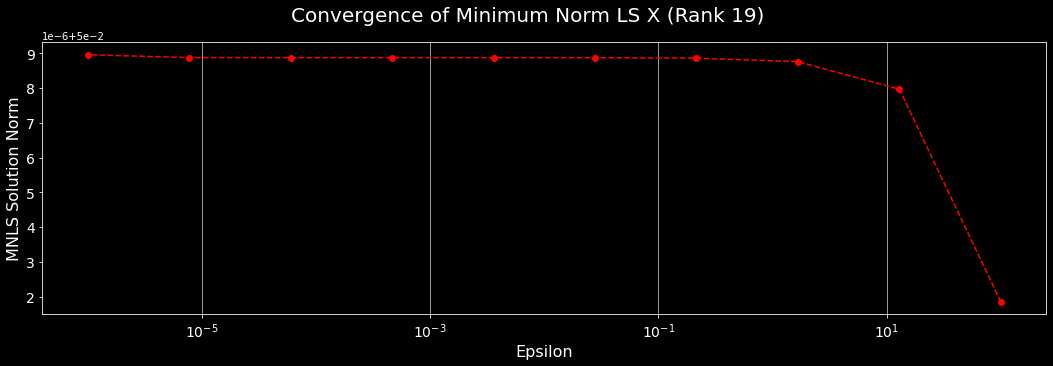

In [5]:
'''Plot Convergence of the Shortest Least-Square Solution Vector'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(18,5))
ax.semilogx(epsilon_values, x_norm_history,'ro--')
ax.set_ylabel('MNLS Solution Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS X (Rank %s)'%str(a_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

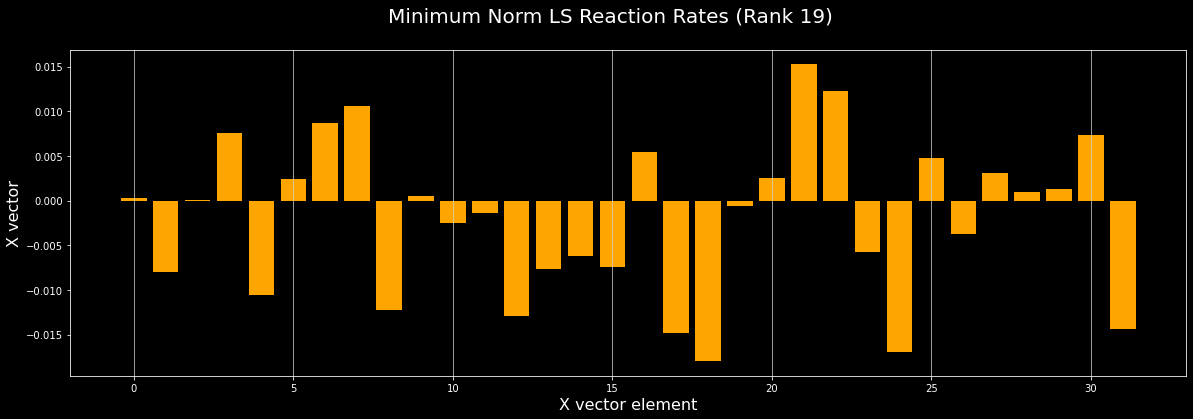

In [6]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Universal Solver](#toc)<a id="usolver"></a>

Compute the solution vector $\xvec$, given $\Amtrx$ and $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

In [ ]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=100, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

In [ ]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

In [ ]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

In [ ]:
import numpy as np

try:    
    from chen_3170.toolkit import universal_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

x_vec = universal_solve(a_mtrx, b_vec, epsilon_min=-6, pivot_tol=1e-6)

print('max(abs(b - Ax)) = %3.3e'%np.max(np.abs(b_vec-a_mtrx@x_vec)))

In [ ]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Anomalous Linear Least-Squares Data Fitting](#toc)<a id="fit"></a>

Example of data fitting where the universal solver is the only way to find a satisfactory fit.

In [ ]:
import numpy as np

m_pts = 7

x_values = 1*np.ones(m_pts)
y_values = 1.12 * abs(np.random.random(m_pts))

a_mtrx = np.zeros((m_pts, 2))
a_mtrx[:,0] = np.ones(m_pts)
a_mtrx[:,1] = -x_values


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

plt.plot(x_values, y_values, 'r*', label='experimental')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.ylabel(r'$y$ []',fontsize=14)
plt.xlim(min(x_values)-.1, max(x_values)+.1)
plt.title('Some Arbitrary Data',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

rank = matrix_rank(a_mtrx)

if rank == min(np.shape(a_mtrx)):
    print('Full-rank matrix')
else:
    print('Rank-deficient matrix')
print('matrix rank = ', rank)

In [ ]:
try:    
    from chen_3170.toolkit import universal_solve   
    from chen_3170.toolkit import solve  
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'
    
x_vec = universal_solve(a_mtrx, y_values, epsilon_min=-6, pivot_tol=1e-9)

#this will not work: x_vec = solve(a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@y_values, pivot_tol=1e-7)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

n_plot_pts = 15
x_plot = np.linspace(min(x_values)-.01, max(x_values)+.01, n_plot_pts)
a_mtrx_x = np.ones((n_plot_pts, 2))
a_mtrx_x[:,1]= -x_plot

plt.plot(x_values, y_values,'r*',label='experimental')
plt.plot(x_plot, a_mtrx_x@x_vec,'y*',label='MNLS')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.xlim(min(x_values)-.01, max(x_values)+.01)
plt.ylabel(r'$y$ []',fontsize=14)
plt.title('Linear Least-Squared Approximation',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_values

In [ ]:
y_values.mean()

In [ ]:
a_mtrx_x@x_vec

In [ ]:
(a_mtrx_x@x_vec).mean()